In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
author_papers = pd.read_csv("./data/author_papers.txt", sep="-|:", names=['author', 'p1', 'p2', 'p3', 'p4', 'p5'], header=None)
df_train = pd.read_csv("./data/train.csv", dtype={"author": np.int64, "hindex": np.float32})

/Users/Wohlfarth/Documents/Coding/PCodes/Python/machine-deep-learning/project/env/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
author_papers['#papers'] =  author_papers.count(axis=1) - 1

In [4]:
merge = pd.merge(author_papers, df_train, on="author", how="left")
forplot = merge[merge['hindex'].notna()]

In [5]:
low_cited = len(author_papers[author_papers['#papers'] < 5])

In [6]:
# Percantage of low cited in the training set
low_cited/len(df_train)

0.2684270636646943

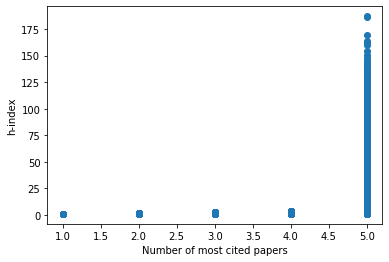

In [7]:
plt.scatter(forplot['#papers'], forplot['hindex'])
plt.xlabel('Number of most cited papers')
plt.ylabel('h-index')
plt.show()